# WeatherPy


In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import os
import csv
import time
import datetime
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# randomly generate a list of lats and longs
# numpy.random.uniform(low=0.0, high=1.0, size=None)
lat = np.random.uniform(low=-90.00, high=90.00, size=600)
lon = np.random.uniform(low=-180.00, high=180.00, size=600)
latlong = zip(lat, lon)

In [4]:
# Use citipy to generate the a list of the closest cities to your random coordinates. 
cities = []
for c in latlong:
    cities.append(citipy.nearest_city(c[0], c[1]))

In [5]:
city_name=[]
for city in cities:
    name = city.city_name
    city_name.append(name)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Use Openweather api to get the weather data needed from those cities.
url = "http://api.openweathermap.org/data/2.5/weather?"
temps = []
humid = []
clouds = []
winds = []
lats = []
lons = []
names = []

# Build query URL
for city in city_name:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    response = requests.get(query_url)
    if response.status_code == 200:
        response = response.json()
        temps.append(response["main"]["temp"])
        humid.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        winds.append(response["wind"]["speed"])
        lats.append(response["coord"]["lat"])
        lons.append(response["coord"]["lon"])
        names.append(response["name"])

In [7]:
#Populating dataframe
weather_data = pd.DataFrame({"City": names,
                        "Temperature (F)": temps,
                        "Humidity (%)": humid,
                        "Cloud Coverage (%)": clouds,
                        "Wind Speed (mph)": winds,
                        "Latitude": lats, 
                        "Longitude": lons
                       })
weather_data.head()

,City,Temperature (F),Humidity (%),Cloud Coverage (%),Wind Speed (mph),Latitude,Longitude
0,Chui,58.53,73,69,15.46,-33.70,-53.46
1,Puerto Ayora,71.91,69,20,13.87,-0.74,-90.35
2,Albany,67.21,82,22,5.01,42.60,-73.97
3,Suntar,13.84,96,56,3.76,62.14,117.63
4,Lebu,50.05,77,0,15.73,-37.62,-73.65


In [8]:
# Set variable for output file
output_file = os.path.join('..', 'output_data', 'cities.csv')
#  Open the output file
with open(output_file, 'w') as datafile:
    weather_data.to_csv(output_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

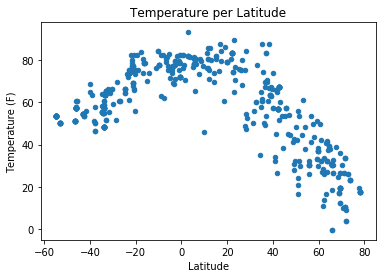

In [9]:
weather_data.plot.scatter(x="Latitude", y="Temperature (F)", title="Temperature per Latitude")
plt.savefig('Temp_perLat.png')

## Latitude vs. Humidity Plot

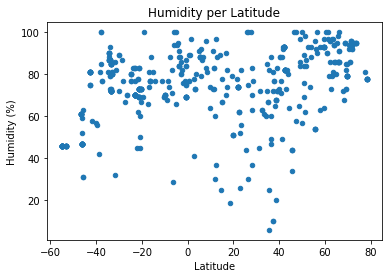

In [10]:
weather_data.plot.scatter(x="Latitude", y="Humidity (%)", title="Humidity per Latitude")
plt.savefig('HumidityperLat.png')

## Latitude vs. Cloudiness Plot

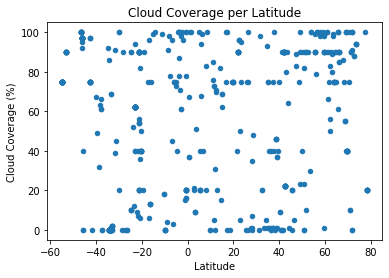

In [11]:
weather_data.plot.scatter(x="Latitude", y="Cloud Coverage (%)", title="Cloud Coverage per Latitude")
plt.savefig('CloudperLat.png')

## Latitude vs. Wind Speed Plot

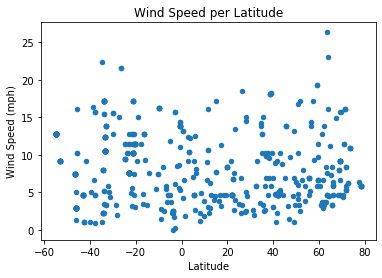

In [12]:
weather_data.plot.scatter(x="Latitude", y="Wind Speed (mph)", title="Wind Speed per Latitude")
plt.savefig('WindperLat.png')

## Linear Regression

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_data.loc[weather_data["Latitude"]>0.01]
southern_hemisphere = weather_data.loc[weather_data["Latitude"]<-0.01]

#Northern_hemisphere.head()
southern_hemisphere.head()

,City,Temperature (F),Humidity (%),Cloud Coverage (%),Wind Speed (mph),Latitude,Longitude
0,Chui,58.53,73,69,15.46,-33.70,-53.46
1,Puerto Ayora,71.91,69,20,13.87,-0.74,-90.35
4,Lebu,50.05,77,0,15.73,-37.62,-73.65
5,Port Alfred,63.54,85,0,12.35,-33.59,26.89
6,Hobart,54.39,81,75,4.70,-42.88,147.33


In [14]:
# Define plotting function

def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"output_data/fig{ifig}.png")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

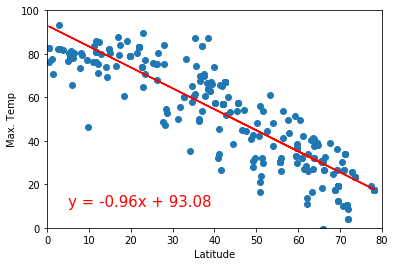

In [15]:

#Create a Scatter Plot for Lattitude vs Temperature of City
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH MAX TEMP VS LATITUDE.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

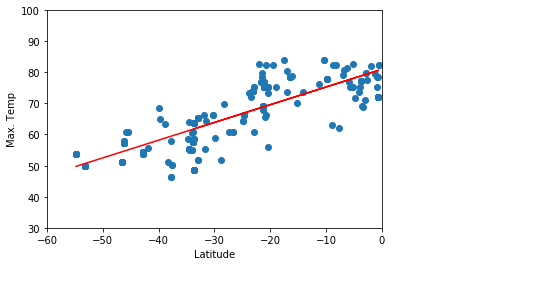

In [16]:
#Create a Scatter Plot for Lattitude vs Temperature of City (Southern Hemisphere)
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.ylim(30, 100)
plt.xlim(-60, 0, 10)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTH MAX TEMP VS LATITUDE.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

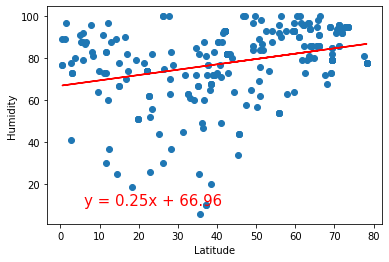

In [17]:
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH HUMIDITY VS LATITUDE.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

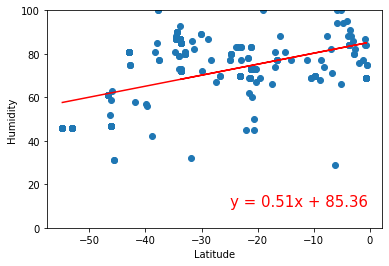

In [18]:
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

plt.ylim(0, 100)

plt.ylabel("Humidity")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTH HUMIDITY VS LATITUDE.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

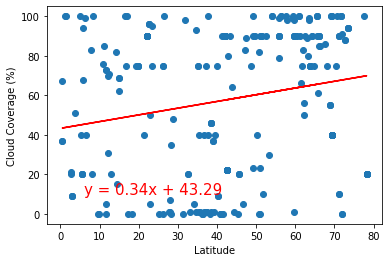

In [19]:
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Cloud Coverage (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Cloud Coverage (%)")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH CLOUD COVERAGE VS LATTITUDE.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

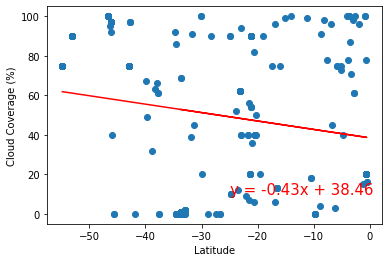

In [21]:
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Cloud Coverage (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.ylabel("Cloud Coverage (%)")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTHERN CLOUD COVERAGE VS LATITUDE.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,22),fontsize=15,color="red")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTHERN WIND SPEED VS LATITUDE.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTHERN WIND SPEED VS LATITUDE.png")